In [27]:
import ugradio #if remote git clone this module
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from scipy import signal

No module named 'rtlsdr'


# Used code from Sec_5_Better_Data.ipynb

In [28]:
#Load Data
test_data = pd.read_csv('data/alias_data') #load dataframe


In [29]:
#experimentation cell

titles = test_data.columns[1:7] #datatype is a pandas index with string values; can pull strings by indexing
times = np.array(range(len(test_data.loc[:, f'{titles[0]}']))) #initialize arbitrary numpy array to make up x-axis for plot
#normalize x-axis, sample rate of 1024 kHz and 2048 samples means sample taken every 2ms
times = 2*times

#r'Power Spectrum $(\nu = 100 kHz, \nu_s ='+titles[k][5:]+'kHz)$'
#times = range(len(test_data.loc[:, f'{titles[0]}']))
titles

Index(['data', 'data2', 'data3', 'data4', 'data5', 'data6'], dtype='object')

In [30]:
def volt_spec(sample):
    data = test_data[sample]
    fourier = ugradio.dft.dft(data)
    return fourier

def power_spec(sample): #inputs: fgen freq, sample rate (must be strings)
    volt = volt_spec(sample)
    return volt[0], abs(volt[1])**2 #returns power spectrum of specified frequencies

# Waveforms in time domain

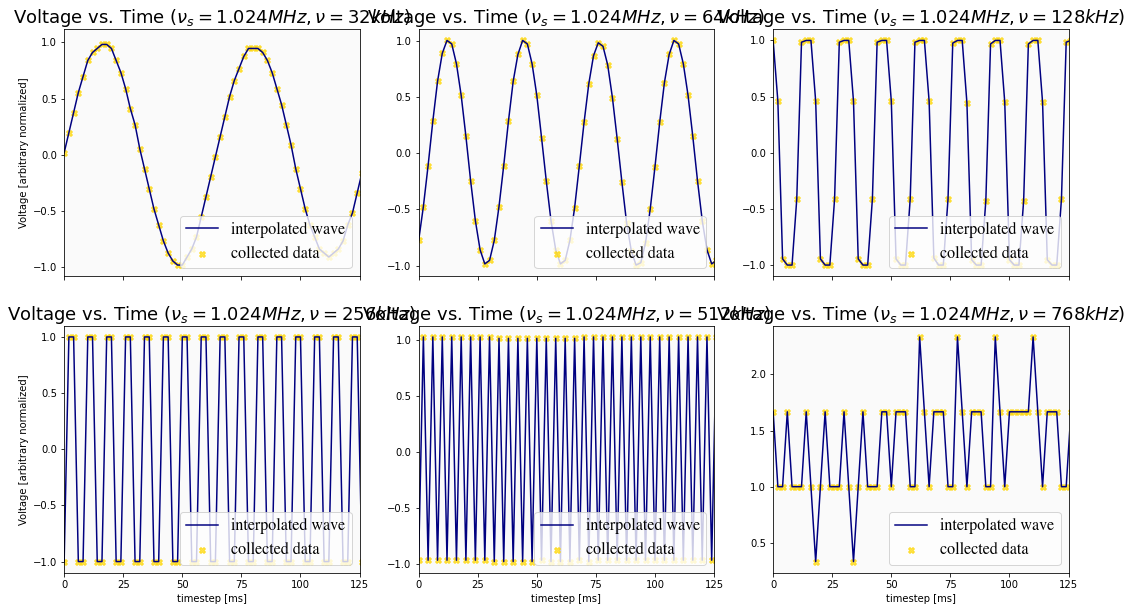

In [31]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10), squeeze=True, facecolor = 'white', sharex = True)
plt.title('Power Spectra')

plt.rcParams["font.family"] = "times"
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams["mathtext.rm"] = "times"
plt.rcParams["mathtext.it"] = "times"
plt.rc('font', size=16)
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize = 18)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)

# alias_data doesn't have the naming scheme as data used for this code so need a list of frequencies used
freq = [32, 64, 128, 256, 512, 768]

for i, vax in enumerate(axes):
    for j, hax in enumerate(vax):
        k = 3*i + j
        hax.set_title(r'Voltage vs. Time $(\nu_s = 1.024 MHz, \nu ='+str(freq[k])+'kHz)$')
        #normalize y-axis
        volt = np.array(test_data.loc[:, f'{titles[k]}'])
        max_volt = (max(volt) - min(volt))/2
        volt_normal = (1/max_volt) * volt
        hax.plot(times,  volt_normal, color = 'navy', label='interpolated wave')
        hax.scatter(times, volt_normal, color = 'gold', marker = 'X', alpha = 0.7, label='collected data')
        #used blue-orange color scheme out of color-blindness considerations^
        hax.set_facecolor('#fafafa')
        hax.set_xlim([0, 125])
        hax.legend(loc = 4, )

plt.setp(axes[-1, :], xlabel='timestep [ms]')
plt.setp(axes[:, 0], ylabel='Voltage [arbitrary normalized]')

fig.savefig('aliasing_freq.png', bbox_inches='tight')

# Power Spectra

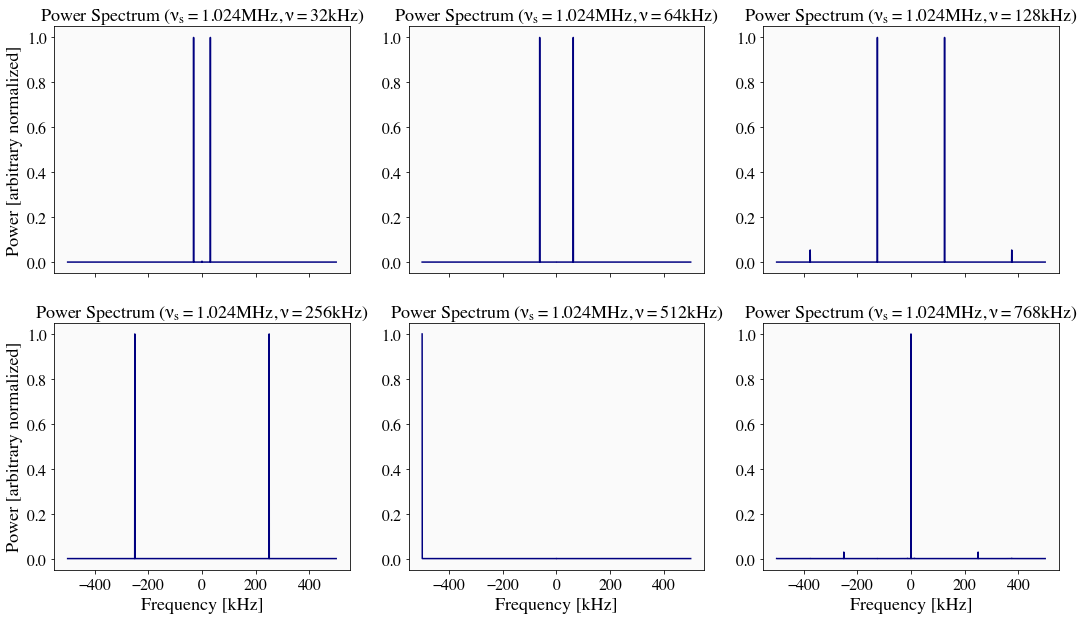

In [32]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10), squeeze=True, facecolor = 'white', sharex=True)
plt.title('Power Spectra')

for i, vax in enumerate(axes):
    for j, hax in enumerate(vax):
        k = 3*i + j
        hax.set_title(r'Power Spectrum $(\nu_s = 1.024 MHz, \nu ='+str(freq[k])+'kHz)$')
        #normalize power
        power = power_spec(f'{titles[k]}')[1].real
        power_norm = power/max(power)
        #fix frequency
        frequency = power_spec(f'{titles[k]}')[0] * 1000
        hax.plot(frequency, power_norm, color = 'navy', label='real')
        #used blue-orange color scheme out of color-blindness considerations^
#         hax.set_yscale('log') #comment this line out for linear scale
        hax.set_facecolor('#fafafa')

plt.setp(axes[-1, :], xlabel='Frequency [kHz]')
plt.setp(axes[:, 0], ylabel='Power [arbitrary normalized]')

fig.savefig('power_spec.png', bbox_inches='tight')

# Voltage Spectra

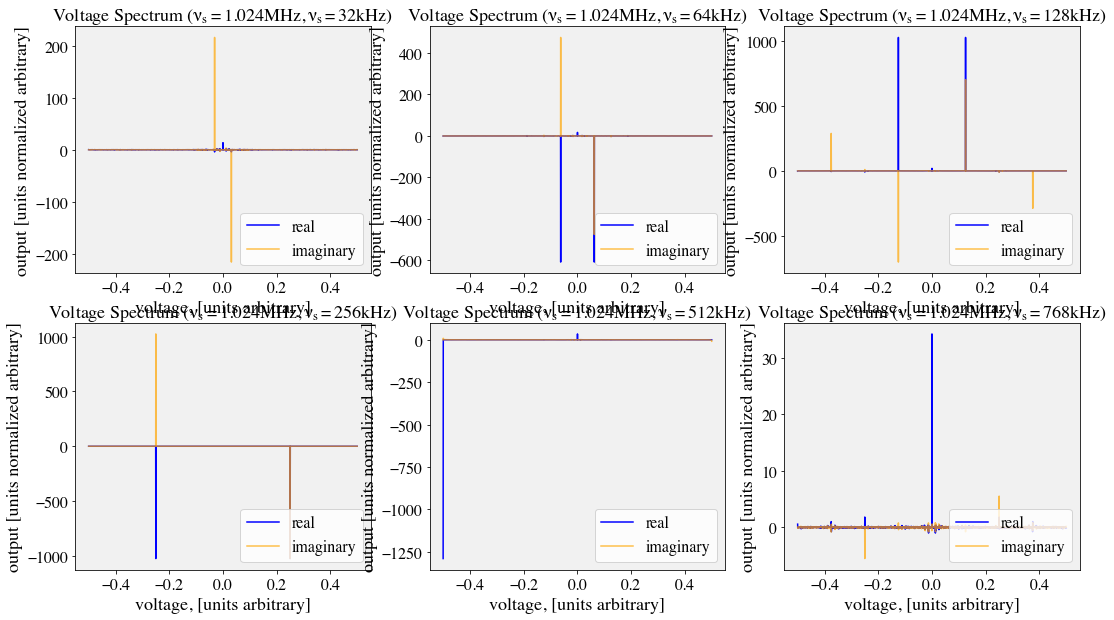

In [33]:

fig, axes = plt.subplots(2, 3, figsize=(18, 10), squeeze=True, facecolor = 'white')
plt.title('Voltage Spectra')

for i, vax in enumerate(axes):
    for j, hax in enumerate(vax):
        k = 3*i + j
        hax.set_title(r'Voltage Spectrum $(\nu_s = 1.024 MHz, \nu_s ='+str(freq[k])+'kHz)$')
        hax.plot(volt_spec(f'{titles[k]}')[0], volt_spec(f'{titles[k]}')[1].real, color = 'blue', label='real')
        hax.plot(volt_spec(f'{titles[k]}')[0], volt_spec(f'{titles[k]}')[1].imag, color = 'orange', alpha = 0.7, label='imaginary')
        #used blue-orange color scheme out of color-blindness considerations^
#         hax.set_yscale('log') #comment this line out for linear scale
        hax.set_facecolor('#f1f1f1')
        hax.set_xlabel('voltage, [units arbitrary]')
        hax.set_ylabel(r'output [units normalized arbitrary]')
        hax.legend(loc = 4, )

In [34]:
pspec1 = power_spec(f'{titles[0]}') #load data in this cell so we don't have to load it repeatedly
pspec5 = power_spec(f'{titles[4]}')
inv_pspec1 = ugradio.dft.idft(pspec1[1])
inv_pspec5 = ugradio.dft.idft(pspec5[1])

/Users/nolanlee/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'Autocorrelation Function')

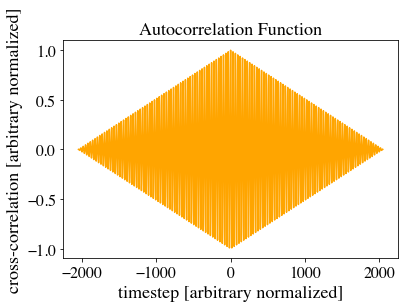

In [35]:
scipyacf = signal.correlate(inv_pspec1[1], inv_pspec1[1], mode='full')
x = np.linspace(-2048, 2047, 4095)
plt.xlabel('timestep [arbitrary normalized]')
plt.ylabel('cross-correlation [arbitrary normalized]')
plt.plot(x, scipyacf * 1/max(scipyacf), color='orange')
plt.title('Autocorrelation Function')
# plt.xlim(0, 100)

/Users/nolanlee/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


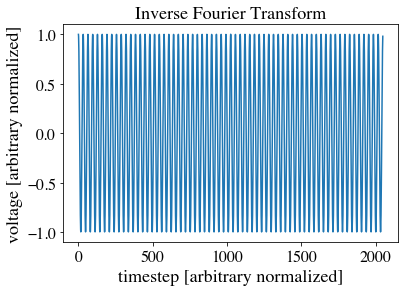

In [36]:
plt.title('Inverse Fourier Transform')
plt.xlabel('timestep [arbitrary normalized]')
plt.ylabel('voltage [arbitrary normalized]')
plt.plot(inv_pspec1[1] * (1/max(inv_pspec1[1])))
# plt.xlim(0, 100)

/Users/nolanlee/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/nolanlee/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(0.0, 100.0)

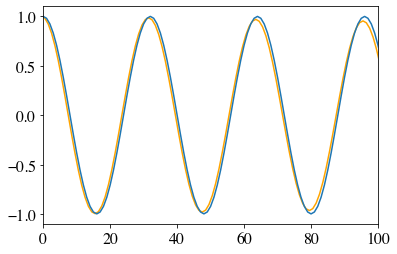

In [37]:
plt.plot(x, scipyacf * 1/max(scipyacf), color='orange')
plt.plot(inv_pspec1[1] * 1/max(inv_pspec1[1]))
plt.xlim(0, 100)

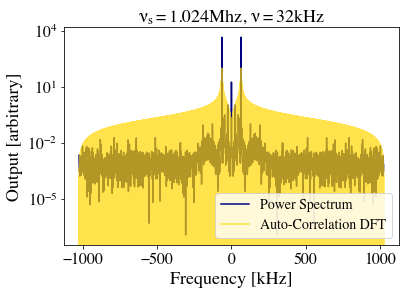

In [38]:
plt.rc('legend', fontsize=14)

scipyacf = signal.correlate(inv_pspec1[1], inv_pspec1[1], mode='full')
acf_dft = ugradio.dft.dft(scipyacf, vsamp=len(scipyacf))
plt.yscale('log')

data1 = test_data[f'{titles[0]}']
data1_dft = ugradio.dft.dft(data1, vsamp=len(data1))
data1_pow = abs(data1_dft[1])**2

plt.plot(data1_dft[0], data1_pow*1e-1, color='navy', label='Power Spectrum')
plt.plot(acf_dft[0]*1/2, acf_dft[1].real*1e-7, color='gold', alpha=0.7, label='Auto-Correlation DFT')
plt.xlabel('Frequency [kHz]')
plt.ylabel('Output [arbitrary]')
plt.title(r'$\nu_s = 1.024$Mhz, $\nu = 32$kHz')
plt.legend(loc = 4)

plt.savefig('ACFvsPower.png', bbox_inches='tight')

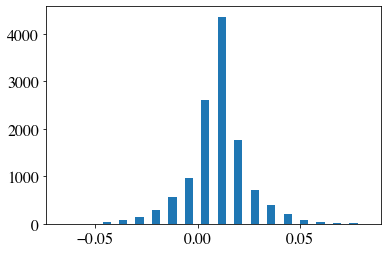

In [39]:
import matplotlib.pyplot as plt
import numpy as np

noise_data = np.loadtxt('data/noise_data', delimiter=',', skiprows=1)
voltage = noise_data[:,1]

n,bins,_ = plt.hist(voltage, bins = 37)

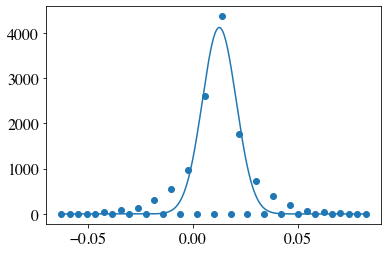

In [40]:
#Gaussian function
def gauss_function(x, a,x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

# program
from scipy.optimize import curve_fit
x = bins[1:]
y = n
plt.scatter(x,y) #Plot the curve, the gaussian is quite clear
#plt.plot(x,y,'ok') #Overplot the dots

# Try to fit the result
popt, pcov = curve_fit(gauss_function, x, y)

smoothx = np.linspace(x.min(),x.max(),10000)
smoothy = 2*gauss_function(smoothx,*popt)
plt.plot(smoothx,smoothy)


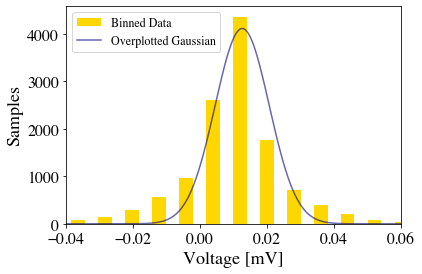

In [44]:
plt.rc('legend', fontsize=12)

plt.hist(voltage, bins = bins, label = "Binned Data", color='gold')
plt.plot(smoothx,smoothy, label = "Overplotted Gaussian", color='navy', alpha=0.6)
plt.legend(loc = 2)
plt.xlabel('Voltage [mV]')
plt.ylabel('Samples')
plt.xlim(-0.04, 0.06)

plt.savefig('noiseplot.png', bbox_inches='tight')

In [164]:
import statistics

print(np.mean(voltage))
print(statistics.variance(voltage))
print(statistics.stdev(voltage))
print(len(voltage))

0.009917534722222189
0.0002050280868401764
0.014318801864687437
12288


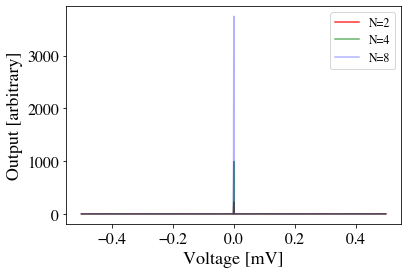

In [156]:
import random

random.seed(123)
volt_ran = np.copy(voltage)
random.shuffle(volt_ran)
split = np.array_split(volt_ran, 16)
def power_spec_noise(array):
    fourier = ugradio.dft.dft(array)
    return fourier[0], abs(fourier[1])**2

x, y = power_spec_noise(split[6] + split[9])
x2, y2 = power_spec_noise(split[7] + split[8] + split[1] + split[2])
x3, y3 = power_spec_noise(split[10] + split[12] + split[13] + split[14] + split[15] + split[0] + split[1] + split[2])
plt.plot(x, y, alpha=0.8, color='red', label='N=2')
plt.plot(x2, y2, alpha=0.6, color='green', label='N=4')
plt.plot(x3, y3, alpha=0.3, color='blue', label='N=8')
# plt.yscale('log')
plt.xlabel('Voltage [mV]')
plt.ylabel('Output [arbitrary]')
plt.legend()

plt.savefig('noisepower.png', bbox_inches='tight')

In [163]:
print(max(y))
print(max(y2))
print(max(y3))
x4, y4 = power_spec_noise(voltage)
print(max(y4))

224.88236831987544
991.632449058048
3743.520246059182
14851.484444444342


In [183]:
def power_spec_f(data):
    fourier = ugradio.dft.dft(data, vsamp = 31.25)
    power = np.abs(fourier[1])**2
    return fourier[0], power

In [184]:
df_dsb = pd.read_csv('data/dsb_data')
dsb_plus = df_dsb['Plus']
dsb_minus = df_dsb['Minus']

In [185]:
dsb_power_plus = power_spec_f(dsb_plus)
dsb_power_minus = power_spec_f(dsb_minus)

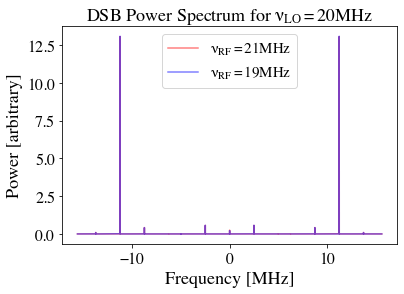

In [214]:
plt.rc('legend', fontsize=15)

plt.figure()
plt.plot(dsb_power_plus[0], dsb_power_plus[1]*1e-13, color='red', label=r'$\nu_{RF} = 21 MHz$', alpha=0.5)
plt.title(r'DSB Power Spectrum for $\nu_{LO} = 20 MHz$')
plt.plot(dsb_power_minus[0], dsb_power_minus[1]*1e-13, color='blue', label=r'$\nu_{RF} = 19 MHz$', alpha=0.5)
plt.legend()
# plt.yscale('log')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Power [arbitrary]')

plt.savefig('dsb_power.png', bbox_inches='tight')

In [198]:
def csv2numpy(fname):
    csv_data_plus, csv_data_minus = pd.read_csv('data/'+fname)['Plus'], pd.read_csv('data/'+fname)['Minus']
    N_samples = len(csv_data_plus)
    np_data = np.empty((N_samples,2), dtype='complex')
    for i in range(N_samples):
        if not csv_data_plus[i][0] == '(':
            np_data[i, 0] = complex(csv_data_plus[i])
        else:
            np_data[i,0] = complex(csv_data_plus[i][1:-1])
        if not csv_data_minus[i][0] == '(':
            np_data[i, 1] = complex(csv_data_plus[i])
        else:
            np_data[i,1] = complex(csv_data_minus[i][1:-1])
    return np_data

ssb_0 = csv2numpy('ssb_0_data.csv')
ssb_0_plus = ssb_0[:, 0]
ssb_0_minus = ssb_0[:, 1]
ssb_0_power_plus = power_spec_f(ssb_0_plus)
ssb_0_power_minus = power_spec_f(ssb_0_minus)

ssb_90 = csv2numpy('ssb_90_data.csv')
ssb_90_plus = ssb_90[:, 0]
ssb_90_minus = ssb_90[:, 1]
ssb_90_power_plus = power_spec_f(ssb_90_plus)
ssb_90_power_minus = power_spec_f(ssb_90_minus)

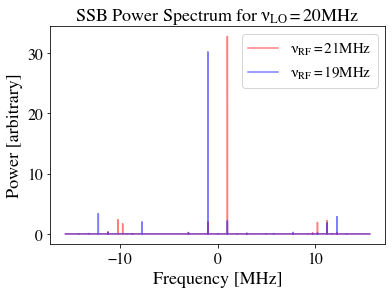

In [206]:
plt.rc('legend', fontsize=15)

plt.figure()
plt.plot(ssb_90_power_plus[0], ssb_90_power_plus[1]*1e-14, color='red', label=r'$\nu_{RF} = 21 MHz$', alpha=0.5)
plt.title(r'SSB Power Spectrum for $\nu_{LO} = 20 MHz$')
plt.plot(ssb_90_power_minus[0], ssb_90_power_minus[1]*1e-14, color='blue', label=r'$\nu_{RF} = 19 MHz$', alpha=0.5)
plt.legend()
# plt.yscale('log')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Power [arbitrary]')

plt.savefig('ssb_power.png', bbox_inches='tight')